## Problem3

An online car sales platform would like to improve its customer base and their experience by providing them an easy way to buy and sell cars. For this, they would like an automated model which can predict the price of the car once the user inputs the required factors. Help the business achieve their objective by applying multilinear regression on the given dataset. Please use the below columns for the analysis purpose: price, age_08_04, KM, HP, cc, Doors, Gears, Quarterly_Tax, and Weight.

In [184]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('ToyotaCorolla.csv',encoding='unicode_escape')

In [185]:
data.shape

(1436, 38)

### Null values imputation

In [186]:
data.isnull().sum().sum()

0

We observe that Actual_Shipment_Time, Shipment_Delay and Delivery_Status are null for the same set of rows. Remaining null values (406) are in Planned_TimeofTravel. We can drop these 82008 rows.

In [187]:
#Drop null valued rows
#data.dropna(inplace=True)

In [188]:
data.shape

(1436, 38)

In [189]:
data.isnull().sum().sum()

0

In [190]:
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [191]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [192]:
data.drop(['Id'],axis=1,inplace=True)

In [193]:
data.head()

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,1,0,0,0,1,0,0,0
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,1,0,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,0,1,0,0,0,1,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,1,0,1,0,1,0,0,0


### EDA

In [194]:
data.Mfg_Year.value_counts()

1999    441
1998    392
2000    225
2001    192
2002     87
2003     75
2004     24
Name: Mfg_Year, dtype: int64

In [195]:
data.columns


Index(['Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [196]:
data.Fuel_Type.value_counts()

Petrol    1264
Diesel     155
CNG         17
Name: Fuel_Type, dtype: int64

In [197]:
data.Model.value_counts()

TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-Doors     107
TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors      83
TOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-Doors        79
TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-Doors       70
TOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-Doors       43
                                                       ... 
TOYOTA Corolla 2.0D 4/5-Doors                             1
TOYOTA Corolla 1.6 16v TERRA 4/5-Doors                    1
TOYOTA Corolla 1.6 HB SOL 2/3-Doors                       1
 TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors      1
TOYOTA Corolla 1.3 Linea Terra 4/5-Doors                  1
Name: Model, Length: 372, dtype: int64

In [198]:
data.Color.value_counts()

Grey      301
Blue      283
Red       278
Green     220
Black     191
Silver    122
White      31
Violet      4
Yellow      3
Beige       3
Name: Color, dtype: int64

In [199]:

data.Cylinders.value_counts()

4    1436
Name: Cylinders, dtype: int64

In [200]:
data.var()

C:\Users\AANAND~1.ORA\AppData\Local\Temp/ipykernel_11288/445316826.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.var()


Price               1.315487e+07
Age_08_04           3.459596e+02
Mfg_Month           1.124989e+01
Mfg_Year            2.373824e+00
KM                  1.406734e+09
HP                  2.244327e+02
Met_Color           2.196010e-01
Automatic           5.264333e-02
cc                  1.801041e+05
Doors               9.075927e-01
Cylinders           0.000000e+00
Gears               3.553619e-02
Quarterly_Tax       1.691563e+03
Weight              2.771088e+03
Mfr_Guarantee       2.419730e-01
BOVAG_Guarantee     9.361078e-02
Guarantee_Period    9.066270e+00
ABS                 1.519047e-01
Airbag_1            2.841226e-02
Airbag_2            2.004814e-01
Airco               2.501043e-01
Automatic_airco     5.326206e-02
Boardcomputer       2.079426e-01
CD_Player           1.709685e-01
Central_Lock        2.437564e-01
Powered_Windows     2.463303e-01
Power_Steering      2.180272e-02
Radio               1.249406e-01
Mistlamps           1.910665e-01
Sport_Model         2.102021e-01
Backseat_D

In [201]:
data.drop(['Cylinders'],axis=1,inplace=True) #drop zero variance column

In [202]:
data.columns

Index(['Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar'],
      dtype='object')

In [203]:
data.dtypes

Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
Tow_Bar              int64
dtype: object

In [204]:
data.corr()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Price,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,0.185326,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,-0.148359,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,-0.012069,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,0.151442,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,-0.036197,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,0.092424,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,0.085243,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,-0.027654,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,0.079903,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725
Doors,0.185326,-0.148359,-0.012069,0.151442,-0.036197,0.092424,0.085243,-0.027654,0.079903,1.000000,...,0.132092,0.107626,0.059792,-0.008318,0.064705,-0.129881,-0.022542,-0.039555,-0.008265,0.102292


In [205]:
data.drop(['Mfg_Year'],axis=1,inplace=True) #drop zero variance column

<AxesSubplot:>

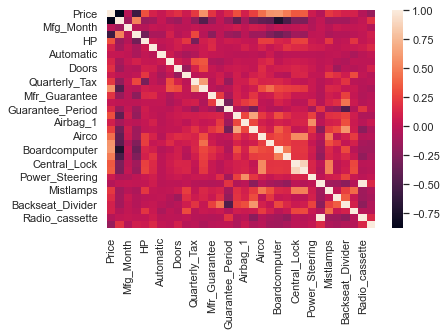

In [206]:
import seaborn as sns
sns.set()
sns.heatmap(data.corr())

In [207]:
import matplotlib.pyplot as plt

#### Label Encode

In [208]:
# Label encode Class variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Model'] = encoder.fit_transform(data['Model'])
data['Fuel_Type'] = encoder.fit_transform(data['Fuel_Type'])
data['Color'] = encoder.fit_transform(data['Color'])

In [209]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Model             1436 non-null   int32
 1   Price             1436 non-null   int64
 2   Age_08_04         1436 non-null   int64
 3   Mfg_Month         1436 non-null   int64
 4   KM                1436 non-null   int64
 5   Fuel_Type         1436 non-null   int32
 6   HP                1436 non-null   int64
 7   Met_Color         1436 non-null   int64
 8   Color             1436 non-null   int32
 9   Automatic         1436 non-null   int64
 10  cc                1436 non-null   int64
 11  Doors             1436 non-null   int64
 12  Gears             1436 non-null   int64
 13  Quarterly_Tax     1436 non-null   int64
 14  Weight            1436 non-null   int64
 15  Mfr_Guarantee     1436 non-null   int64
 16  BOVAG_Guarantee   1436 non-null   int64
 17  Guarantee_Period  1436 non-null  

In [210]:
data.head()

,Model,Price,Age_08_04,Mfg_Month,KM,Fuel_Type,HP,Met_Color,Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,257,13500,23,10,46986,1,90,1,2,0,...,1,1,1,0,0,0,1,0,0,0
1,257,13750,23,10,72937,1,90,1,6,0,...,1,0,1,0,0,0,1,0,0,0
2,365,13950,24,9,41711,1,90,1,2,0,...,0,0,1,0,0,0,1,0,0,0
3,257,14950,26,7,48000,1,90,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,256,13750,30,3,38500,1,90,0,1,0,...,1,1,1,0,1,0,1,0,0,0


#### Drop Duplicates

In [211]:
data.duplicated().sum()

0

In [212]:
#data.drop_duplicates(subset=None, keep='first', inplace=True)

In [213]:
data.duplicated().sum()

0

In [214]:
data.shape

(1436, 35)

In [215]:
data.dtypes

Model               int32
Price               int64
Age_08_04           int64
Mfg_Month           int64
KM                  int64
Fuel_Type           int32
HP                  int64
Met_Color           int64
Color               int32
Automatic           int64
cc                  int64
Doors               int64
Gears               int64
Quarterly_Tax       int64
Weight              int64
Mfr_Guarantee       int64
BOVAG_Guarantee     int64
Guarantee_Period    int64
ABS                 int64
Airbag_1            int64
Airbag_2            int64
Airco               int64
Automatic_airco     int64
Boardcomputer       int64
CD_Player           int64
Central_Lock        int64
Powered_Windows     int64
Power_Steering      int64
Radio               int64
Mistlamps           int64
Sport_Model         int64
Backseat_Divider    int64
Metallic_Rim        int64
Radio_cassette      int64
Tow_Bar             int64
dtype: object

In [216]:
data.columns

Index(['Model', 'Price', 'Age_08_04', 'Mfg_Month', 'KM', 'Fuel_Type', 'HP',
       'Met_Color', 'Color', 'Automatic', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar'],
      dtype='object')

In [217]:
data['Price_new'] = data['Price']

In [218]:
data.drop(['Price'],axis=1,inplace=True) #drop zero variance column

In [219]:
data.head()

,Model,Age_08_04,Mfg_Month,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Price_new
0,257,23,10,46986,1,90,1,2,0,2000,...,1,1,0,0,0,1,0,0,0,13500
1,257,23,10,72937,1,90,1,6,0,2000,...,0,1,0,0,0,1,0,0,0,13750
2,365,24,9,41711,1,90,1,2,0,2000,...,0,1,0,0,0,1,0,0,0,13950
3,257,26,7,48000,1,90,0,1,0,2000,...,0,1,0,0,0,1,0,0,0,14950
4,256,30,3,38500,1,90,0,1,0,2000,...,1,1,0,1,0,1,0,0,0,13750


#### standardize

In [220]:
data.iloc[:,:-1]

,Model,Age_08_04,Mfg_Month,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,257,23,10,46986,1,90,1,2,0,2000,...,1,1,1,0,0,0,1,0,0,0
1,257,23,10,72937,1,90,1,6,0,2000,...,1,0,1,0,0,0,1,0,0,0
2,365,24,9,41711,1,90,1,2,0,2000,...,0,0,1,0,0,0,1,0,0,0
3,257,26,7,48000,1,90,0,1,0,2000,...,0,0,1,0,0,0,1,0,0,0
4,256,30,3,38500,1,90,0,1,0,2000,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,5,69,12,20544,2,86,1,2,0,1300,...,1,1,1,0,1,1,1,0,0,0
1432,8,72,9,19000,2,86,0,4,0,1300,...,0,0,1,0,0,1,1,0,0,0
1433,8,71,10,17016,2,86,0,2,0,1300,...,0,0,1,0,0,0,1,0,0,0
1434,8,70,11,16916,2,86,1,4,0,1300,...,0,0,0,0,0,0,1,0,0,0


In [221]:
### Standardization
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
# Initialise the Scaler
#scaler = MinMaxScaler()
# To scale data
#scaler.fit_transform(data.iloc[:,0:4])
#ct = ColumnTransformer([('MinMax', MinMaxScaler(), data.iloc[:,0:4])],'passthrough')

numerical_columns = ['Model', 'Age_08_04', 'Mfg_Month', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar']
#column_trans = make_column_transformer((numerical_columns, RobustScaler()),remainder='passthrough')
#column_trans.fit_transform(data)

preprocess = make_column_transformer(
    (StandardScaler(),numerical_columns),
    ('passthrough',['Price_new'])
)
data1= preprocess.fit_transform(data)
data1= pd.DataFrame(data1)
data1.columns= data.columns

In [222]:
data1

,Model,Age_08_04,Mfg_Month,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Price_new
0,1.317007,-1.771966,1.327576,-0.574695,-2.337868,-0.768042,0.694219,-0.890258,-0.242893,0.997419,...,0.882853,0.150970,-0.41387,-0.588073,-0.654871,0.546235,-0.507388,-0.412716,-0.620293,13500.0
1,1.317007,-1.771966,1.327576,0.117454,-2.337868,-0.768042,0.694219,1.461923,-0.242893,0.997419,...,-1.132691,0.150970,-0.41387,-0.588073,-0.654871,0.546235,-0.507388,-0.412716,-0.620293,13750.0
2,2.420463,-1.718184,1.029329,-0.715386,-2.337868,-0.768042,0.694219,-0.890258,-0.242893,0.997419,...,-1.132691,0.150970,-0.41387,-0.588073,-0.654871,0.546235,-0.507388,-0.412716,-0.620293,13950.0
3,1.317007,-1.610620,0.432833,-0.547650,-2.337868,-0.768042,-1.440467,-1.478303,-0.242893,0.997419,...,-1.132691,0.150970,-0.41387,-0.588073,-0.654871,0.546235,-0.507388,-0.412716,-0.620293,14950.0
4,1.306790,-1.395491,-0.760158,-0.801028,-2.337868,-0.768042,-1.440467,-1.478303,-0.242893,0.997419,...,0.882853,0.150970,-0.41387,1.700470,-0.654871,0.546235,-0.507388,-0.412716,-0.620293,13750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,-1.257724,0.702015,1.924072,-1.279939,0.354336,-1.035138,0.694219,-0.890258,-0.242893,-0.652594,...,0.882853,0.150970,-0.41387,1.700470,1.527019,0.546235,-0.507388,-0.412716,-0.620293,7500.0
1432,-1.227073,0.863362,1.029329,-1.321120,0.354336,-1.035138,-1.440467,0.285833,-0.242893,-0.652594,...,-1.132691,0.150970,-0.41387,-0.588073,1.527019,0.546235,-0.507388,-0.412716,-0.620293,10845.0
1433,-1.227073,0.809579,1.327576,-1.374036,0.354336,-1.035138,-1.440467,-0.890258,-0.242893,-0.652594,...,-1.132691,0.150970,-0.41387,-0.588073,-0.654871,0.546235,-0.507388,-0.412716,-0.620293,8500.0
1434,-1.227073,0.755797,1.625824,-1.376703,0.354336,-1.035138,0.694219,0.285833,-0.242893,-0.652594,...,-1.132691,-6.623821,-0.41387,-0.588073,-0.654871,0.546235,-0.507388,-0.412716,-0.620293,7250.0


In [223]:
#data1.rename(columns = {'R&D Spend':'RDSpend', 'Marketing Spend':'MarketingSpend'}, inplace = True)

In [224]:
# preparing model considering all the variables 
import statsmodels.formula.api as smf # for regression model
         
ml1 = smf.ols('Price_new ~ Model + Age_08_04 + Mfg_Month + KM +Fuel_Type + HP + Met_Color + Color + Automatic + cc + Doors +Gears + Quarterly_Tax + Weight + Mfr_Guarantee + BOVAG_Guarantee +       Guarantee_Period + ABS + Airbag_1 + Airbag_2 + Airco +Automatic_airco + Boardcomputer + CD_Player + Central_Lock +Powered_Windows + Power_Steering + Radio + Mistlamps + Sport_Model + Backseat_Divider + Metallic_Rim + Radio_cassette +Tow_Bar', data = data1).fit() # regression model
# Summary
ml1.summary()
# p-values for WT, VOL are more than 0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_new   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     411.1
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        07:12:38   Log-Likelihood:                -12087.
No. Observations:                1436   AIC:                         2.424e+04
Df Residuals:                    1401   BIC:                         2.443e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.073e+04     29.239    367.007      0.000    1.07e+04    1.08e+04
Model              -19.7567     38.121     -0.518      0.604     -94.538      55.024
Age_08_04        -2217.7744     64.790    -34.230      0.000   -2344.871   -2090.678
Mfg_Month         -323.4125     30.381    -10.645      0.000    -383.009    -263.816
KM                -615.4798     41.666    -14.772      0.000    -697.213    -533.746
Fuel_Type          394.6073     60.189      6.556      0.000     276.538     512.677
HP                 302.9099     38.374      7.894      0.000     227.633     378.187
Met_Color           -9.7972     31.693     -0.309      0.757     -71.968      52.374
Color              -50.5013     30.609     -1.650      0.099    -110.545       9.542
Automatic           81.1154     30.507      2.659      0.008      21.271     140.960
cc                 -50.3712     32.413     -1.554      0.120    -113.955      13.213
Doors               42.9804     33.291      1.291      0.197     -22.326     108.287
Gears               25.9190     32.933      0.787      0.431     -38.684      90.522
Quarterly_Tax      590.4314     62.989      9.373      0.000     466.868     713.995
Weight             566.3515     53.896     10.508      0.000     460.627     672.076
Mfr_Guarantee      112.1648     32.040      3.501      0.000      49.313     175.016
BOVAG_Guarantee    151.8943     34.298      4.429      0.000      84.613     219.176
Guarantee_Period   199.4146     36.388      5.480      0.000     128.034     270.796
ABS               -101.1109     43.884     -2.304      0.021    -187.197     -15.025
Airbag_1            16.5874     37.138      0.447      0.655     -56.264      89.439
Airbag_2           -35.7158     51.564     -0.693      0.489    -136.867      65.435
Airco              101.0779     39.649      2.549      0.011      23.301     178.855
Automatic_airco    561.6874     38.705     14.512      0.000     485.761     637.613
Boardcomputer     -123.8751     47.586     -2.603      0.009    -217.222     -30.528
CD_Player           86.6881     36.414      2.381      0.017      15.256     158.120
Central_Lock       -46.6319     62.683     -0.744      0.457    -169.594      76.330
Powered_Windows    211.0650     62.861      3.358      0.001      87.753     334.377
Power_Steering      -4.9232     36.795     -0.134      0.894     -77.102      67.256
Radio              179.8840    230.892      0.779      0.436    -273.048     632.816
Mistlamps          -26.9222     42.268     -0.637      0.524    -109.837      55.992
Sport_Model        137.4711     35.722      3.848      0.000      67.397     207.545
Backseat_Divider  -116.1061     47.890     -2.424      0.015    -210.050     -22.163
Metallic_Rim        79.9246     34.075      2.346      0.019      13.081     146.768
Radio_cassette    -212.

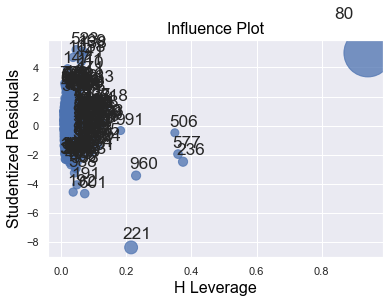

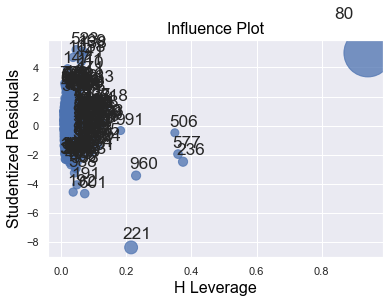

In [225]:
# Checking whether data has any influential values 
# Influence Index Plots
import statsmodels.api as sm

sm.graphics.influence_plot(ml1)
# Studentized Residuals = Residual/standard deviation of residuals
# index 76 is showing high influence so we can exclude that entire row

In [226]:
data1_new = data1.drop(data1.index[[80]])

# Preparing model                  
ml_new = smf.ols('Price_new ~ Model + Age_08_04 + Mfg_Month + KM +Fuel_Type + HP + Met_Color + Color + Automatic + cc + Doors +Gears + Quarterly_Tax + Weight + Mfr_Guarantee + BOVAG_Guarantee +       Guarantee_Period + ABS + Airbag_1 + Airbag_2 + Airco +Automatic_airco + Boardcomputer + CD_Player + Central_Lock +Powered_Windows + Power_Steering + Radio + Mistlamps + Sport_Model + Backseat_Divider + Metallic_Rim + Radio_cassette +Tow_Bar', data = data1_new).fit() # regression model

# Summary
ml_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_new   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     417.2
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        07:12:49   Log-Likelihood:                -12066.
No. Observations:                1435   AIC:                         2.420e+04
Df Residuals:                    1400   BIC:                         2.439e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.071e+04     29.165    367.391      0.000    1.07e+04    1.08e+04
Model               62.7248     41.243      1.521      0.129     -18.179     143.629
Age_08_04        -2175.4322     64.798    -33.572      0.000   -2302.544   -2048.320
Mfg_Month         -308.9955     30.262    -10.211      0.000    -368.358    -249.633
KM                -578.7917     41.960    -13.794      0.000    -661.103    -496.481
Fuel_Type          338.6890     60.719      5.578      0.000     219.579     457.799
HP                 371.1566     40.424      9.182      0.000     291.858     450.455
Met_Color           -3.5743     31.450     -0.114      0.910     -65.268      58.119
Color              -48.5744     30.352     -1.600      0.110    -108.115      10.966
Automatic           66.6088     30.388      2.192      0.029       6.998     126.219
cc                -681.2525    130.219     -5.232      0.000    -936.698    -425.807
Doors               23.4415     33.241      0.705      0.481     -41.765      88.648
Gears               20.6056     32.672      0.631      0.528     -43.485      84.696
Quarterly_Tax      663.6641     64.152     10.345      0.000     537.820     789.508
Weight             654.2460     56.258     11.629      0.000     543.888     764.604
Mfr_Guarantee      111.0850     31.770      3.497      0.000      48.763     173.407
BOVAG_Guarantee    159.4678     34.042      4.684      0.000      92.689     226.247
Guarantee_Period   201.9970     36.084      5.598      0.000     131.212     272.782
ABS                -84.1508     43.645     -1.928      0.054    -169.768       1.467
Airbag_1            21.4820     36.837      0.583      0.560     -50.779      93.743
Airbag_2           -40.6894     51.138     -0.796      0.426    -141.004      59.626
Airco              120.5317     39.506      3.051      0.002      43.035     198.028
Automatic_airco    551.0871     38.436     14.338      0.000     475.688     626.486
Boardcomputer     -124.5108     47.184     -2.639      0.008    -217.069     -31.953
CD_Player           74.4004     36.190      2.056      0.040       3.409     145.392
Central_Lock       -32.6555     62.216     -0.525      0.600    -154.701      89.390
Powered_Windows    188.8017     62.488      3.021      0.003      66.221     311.383
Power_Steering      -1.1911     36.491     -0.033      0.974     -72.775      70.393
Radio              169.5237    228.949      0.740      0.459    -279.597     618.645
Mistlamps          -17.6307     41.951     -0.420      0.674     -99.925      64.664
Sport_Model        130.8422     35.445      3.691      0.000      61.312     200.373
Backseat_Divider  -123.5682     47.508     -2.601      0.009    -216.763     -30.373
Metallic_Rim        77.2470     33.791      2.286      0.022      10.960     143.534
Radio_cassette    -207.

In [227]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
data2 = data.iloc[:,:-1]  
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data2.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data2.values, i)
                          for i in range(len(data2.columns))]
  
print(vif_data)

             feature         VIF
0              Model    4.554277
1          Age_08_04   44.410778
2          Mfg_Month    3.950064
3                 KM    8.809445
4          Fuel_Type  102.487614
5                 HP   78.379159
6          Met_Color    3.611836
7              Color    5.723134
8          Automatic    1.146573
9                 cc   18.203399
10             Doors   24.368220
11             Gears  608.893108
12     Quarterly_Tax   25.244839
13            Weight  677.624890
14     Mfr_Guarantee    2.030889
15   BOVAG_Guarantee   13.143622
16  Guarantee_Period    3.969825
17               ABS   12.021356
18          Airbag_1   54.776505
19          Airbag_2   11.187675
20             Airco    3.731559
21   Automatic_airco    1.834836
22     Boardcomputer    3.656804
23         CD_Player    1.976389
24      Central_Lock   10.943695
25   Powered_Windows   10.549976
26    Power_Steering   70.565445
27             Radio   73.037199
28         Mistlamps    2.786849
29       S

as weight is having highest VIF we will drop it

In [228]:
data1_new.drop(['Weight'],axis=1,inplace=True) #drop zero variance column

In [229]:
# Preparing model                  
ml_new = smf.ols('Price_new ~ Model + Age_08_04 + Mfg_Month + KM +Fuel_Type + HP + Met_Color + Color + Automatic + cc + Doors +Gears + Quarterly_Tax + Mfr_Guarantee + BOVAG_Guarantee +       Guarantee_Period + ABS + Airbag_1 + Airbag_2 + Airco +Automatic_airco + Boardcomputer + CD_Player + Central_Lock +Powered_Windows + Power_Steering + Radio + Mistlamps + Sport_Model + Backseat_Divider + Metallic_Rim + Radio_cassette +Tow_Bar', data = data1_new).fit() # regression model

# Summary
ml_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_new   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     388.5
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        07:12:50   Log-Likelihood:                -12132.
No. Observations:                1435   AIC:                         2.433e+04
Df Residuals:                    1401   BIC:                         2.451e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.073e+04     30.513    351.543      0.000    1.07e+04    1.08e+04
Model               74.5370     43.160      1.727      0.084     -10.129     159.203
Age_08_04        -2366.8571     65.607    -36.076      0.000   -2495.555   -2238.159
Mfg_Month         -342.9560     31.530    -10.877      0.000    -404.808    -281.104
KM                -610.5300     43.831    -13.929      0.000    -696.512    -524.548
Fuel_Type          287.3955     63.393      4.534      0.000     163.039     411.752
HP                 422.5952     42.063     10.047      0.000     340.083     505.108
Met_Color           -9.8937     32.917     -0.301      0.764     -74.466      54.678
Color              -61.7187     31.751     -1.944      0.052    -124.004       0.566
Automatic          135.5914     31.199      4.346      0.000      74.390     196.792
cc                -193.7527    129.059     -1.501      0.134    -446.923      59.417
Doors              151.0965     32.845      4.600      0.000      86.666     215.527
Gears               27.3433     34.196      0.800      0.424     -39.737      94.424
Quarterly_Tax      858.9239     64.814     13.252      0.000     731.781     986.067
Mfr_Guarantee       97.3778     33.234      2.930      0.003      32.183     162.572
BOVAG_Guarantee    123.7931     35.491      3.488      0.001      54.172     193.414
Guarantee_Period   169.3884     37.659      4.498      0.000      95.514     243.263
ABS               -112.7310     45.616     -2.471      0.014    -202.214     -23.248
Airbag_1             5.2466     38.534      0.136      0.892     -70.343      80.837
Airbag_2          -106.7075     53.201     -2.006      0.045    -211.070      -2.346
Airco              124.4525     41.353      3.009      0.003      43.331     205.574
Automatic_airco    644.0841     39.355     16.366      0.000     566.883     721.286
Boardcomputer     -159.8974     49.290     -3.244      0.001    -256.587     -63.208
CD_Player           92.2223     37.850      2.437      0.015      17.974     166.471
Central_Lock       -34.4609     65.128     -0.529      0.597    -162.220      93.298
Powered_Windows    220.5211     65.351      3.374      0.001      92.324     348.718
Power_Steering      -0.1515     38.200     -0.004      0.997     -75.086      74.783
Radio              146.7426    239.659      0.612      0.540    -323.386     616.871
Mistlamps          -20.5954     43.914     -0.469      0.639    -106.741      65.550
Sport_Model        211.4052     36.388      5.810      0.000     140.024     282.787
Backseat_Divider  -122.3070     49.732     -2.459      0.014    -219.865     -24.749
Metallic_Rim        84.2932     35.367      2.383      0.017      14.915     153.672
Radio_cassette    -192.4087    239.344     -0.804      0.422    -661.920     277.102
Tow_Bar           -105.

In [230]:
data2 = data1_new.iloc[:,:-1]  
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data2.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data2.values, i)
                          for i in range(len(data2.columns))]
  
print(vif_data)

             feature        VIF
0              Model   2.018461
1          Age_08_04   4.664026
2          Mfg_Month   1.078927
3                 KM   2.082837
4          Fuel_Type   4.360604
5                 HP   1.917302
6          Met_Color   1.175999
7              Color   1.093944
8          Automatic   1.044294
9                 cc   3.492878
10             Doors   1.170401
11             Gears   1.269551
12     Quarterly_Tax   4.555052
13     Mfr_Guarantee   1.198614
14   BOVAG_Guarantee   1.359390
15  Guarantee_Period   1.539697
16               ABS   2.258743
17          Airbag_1   1.612083
18          Airbag_2   3.072019
19             Airco   1.855223
20   Automatic_airco   1.662010
21     Boardcomputer   2.636943
22         CD_Player   1.551488
23      Central_Lock   4.602818
24   Powered_Windows   4.634183
25    Power_Steering   1.584257
26             Radio  62.352144
27         Mistlamps   2.093241
28       Sport_Model   1.437182
29  Backseat_Divider   2.679018
30      

In [231]:
data1_new.drop(['Radio'],axis=1,inplace=True) #drop zero variance column

In [232]:
# Preparing model                  
ml_new = smf.ols('Price_new ~ Model + Age_08_04 + Mfg_Month + KM +Fuel_Type + HP + Met_Color + Color + Automatic + cc + Doors + Quarterly_Tax + Mfr_Guarantee + BOVAG_Guarantee +       Guarantee_Period + ABS + Airbag_1 + Airbag_2 + Airco +Automatic_airco + Boardcomputer + CD_Player + Central_Lock +Powered_Windows + Power_Steering + Mistlamps + Sport_Model + Backseat_Divider + Metallic_Rim + Radio_cassette +Tow_Bar', data = data1_new).fit() # regression model

# Summary
ml_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_new   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     413.8
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        07:12:50   Log-Likelihood:                -12133.
No. Observations:                1435   AIC:                         2.433e+04
Df Residuals:                    1403   BIC:                         2.450e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.073e+04     30.502    351.666      0.000    1.07e+04    1.08e+04
Model               75.1350     43.138      1.742      0.082      -9.488     159.758
Age_08_04        -2366.8640     65.567    -36.098      0.000   -2495.485   -2238.243
Mfg_Month         -343.4334     31.505    -10.901      0.000    -405.235    -281.632
KM                -608.9589     43.701    -13.935      0.000    -694.686    -523.232
Fuel_Type          290.7675     63.248      4.597      0.000     166.696     414.839
HP                 428.0395     41.498     10.315      0.000     346.635     509.444
Met_Color           -9.3440     32.891     -0.284      0.776     -73.864      55.176
Color              -63.3046     31.700     -1.997      0.046    -125.489      -1.120
Automatic          132.9475     31.038      4.283      0.000      72.061     193.834
cc                -197.1514    128.967     -1.529      0.127    -450.141      55.838
Doors              145.9619     32.303      4.518      0.000      82.594     209.330
Quarterly_Tax      864.2258     64.548     13.389      0.000     737.605     990.846
Mfr_Guarantee       97.6454     33.204      2.941      0.003      32.510     162.780
BOVAG_Guarantee    125.1166     35.450      3.529      0.000      55.577     194.657
Guarantee_Period   170.3654     37.624      4.528      0.000      96.560     244.171
ABS               -111.8513     45.589     -2.453      0.014    -201.280     -22.422
Airbag_1             5.1650     38.412      0.134      0.893     -70.186      80.516
Airbag_2          -106.6873     53.125     -2.008      0.045    -210.901      -2.473
Airco              126.8810     41.268      3.075      0.002      45.927     207.834
Automatic_airco    642.0327     39.288     16.342      0.000     564.964     719.102
Boardcomputer     -160.9366     49.259     -3.267      0.001    -257.565     -64.308
CD_Player           90.7118     37.727      2.404      0.016      16.705     164.718
Central_Lock       -32.6881     65.037     -0.503      0.615    -160.268      94.892
Powered_Windows    217.0902     65.174      3.331      0.001      89.242     344.939
Power_Steering       2.1647     38.058      0.057      0.955     -72.491      76.821
Mistlamps          -14.4538     43.467     -0.333      0.740     -99.722      70.814
Sport_Model        216.1837     35.951      6.013      0.000     145.660     286.708
Backseat_Divider  -126.5412     49.534     -2.555      0.011    -223.710     -29.373
Metallic_Rim        88.1637     34.829      2.531      0.011      19.842     156.486
Radio_cassette     -46.3861     33.264     -1.395      0.163    -111.638      18.865
Tow_Bar           -105.6020     32.435     -3.256      0.001    -169.229     -41.975
==============================================================================
Omnibus:                     

In [233]:
data2 = data1_new.iloc[:,:-1]  
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data2.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data2.values, i)
                          for i in range(len(data2.columns))]
  
print(vif_data)

             feature       VIF
0              Model  2.018461
1          Age_08_04  4.662609
2          Mfg_Month  1.078780
3                 KM  2.081217
4          Fuel_Type  4.360412
5                 HP  1.917294
6          Met_Color  1.175889
7              Color  1.093187
8          Automatic  1.044123
9                 cc  3.492375
10             Doors  1.169637
11             Gears  1.269466
12     Quarterly_Tax  4.551812
13     Mfr_Guarantee  1.197498
14   BOVAG_Guarantee  1.359229
15  Guarantee_Period  1.537991
16               ABS  2.258728
17          Airbag_1  1.606671
18          Airbag_2  3.067974
19             Airco  1.852927
20   Automatic_airco  1.659900
21     Boardcomputer  2.636888
22         CD_Player  1.550344
23      Central_Lock  4.593216
24   Powered_Windows  4.613249
25    Power_Steering  1.573933
26         Mistlamps  2.081124
27       Sport_Model  1.436703
28  Backseat_Divider  2.670097
29      Metallic_Rim  1.355799
30    Radio_cassette  1.203376
31      

In [234]:
# Final model
final_ml = smf.ols('Price_new ~ Model + Age_08_04 + Mfg_Month + KM +Fuel_Type + HP + Met_Color + Color + Automatic + cc + Doors + Quarterly_Tax + Mfr_Guarantee + BOVAG_Guarantee +       Guarantee_Period + ABS + Airbag_1 + Airbag_2 + Airco +Automatic_airco + Boardcomputer + CD_Player + Central_Lock +Powered_Windows + Power_Steering + Mistlamps + Sport_Model + Backseat_Divider + Metallic_Rim + Radio_cassette +Tow_Bar', data = data1_new).fit() # regression model
final_ml.summary()     

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_new   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     413.8
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        07:12:51   Log-Likelihood:                -12133.
No. Observations:                1435   AIC:                         2.433e+04
Df Residuals:                    1403   BIC:                         2.450e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.073e+04     30.502    351.666      0.000    1.07e+04    1.08e+04
Model               75.1350     43.138      1.742      0.082      -9.488     159.758
Age_08_04        -2366.8640     65.567    -36.098      0.000   -2495.485   -2238.243
Mfg_Month         -343.4334     31.505    -10.901      0.000    -405.235    -281.632
KM                -608.9589     43.701    -13.935      0.000    -694.686    -523.232
Fuel_Type          290.7675     63.248      4.597      0.000     166.696     414.839
HP                 428.0395     41.498     10.315      0.000     346.635     509.444
Met_Color           -9.3440     32.891     -0.284      0.776     -73.864      55.176
Color              -63.3046     31.700     -1.997      0.046    -125.489      -1.120
Automatic          132.9475     31.038      4.283      0.000      72.061     193.834
cc                -197.1514    128.967     -1.529      0.127    -450.141      55.838
Doors              145.9619     32.303      4.518      0.000      82.594     209.330
Quarterly_Tax      864.2258     64.548     13.389      0.000     737.605     990.846
Mfr_Guarantee       97.6454     33.204      2.941      0.003      32.510     162.780
BOVAG_Guarantee    125.1166     35.450      3.529      0.000      55.577     194.657
Guarantee_Period   170.3654     37.624      4.528      0.000      96.560     244.171
ABS               -111.8513     45.589     -2.453      0.014    -201.280     -22.422
Airbag_1             5.1650     38.412      0.134      0.893     -70.186      80.516
Airbag_2          -106.6873     53.125     -2.008      0.045    -210.901      -2.473
Airco              126.8810     41.268      3.075      0.002      45.927     207.834
Automatic_airco    642.0327     39.288     16.342      0.000     564.964     719.102
Boardcomputer     -160.9366     49.259     -3.267      0.001    -257.565     -64.308
CD_Player           90.7118     37.727      2.404      0.016      16.705     164.718
Central_Lock       -32.6881     65.037     -0.503      0.615    -160.268      94.892
Powered_Windows    217.0902     65.174      3.331      0.001      89.242     344.939
Power_Steering       2.1647     38.058      0.057      0.955     -72.491      76.821
Mistlamps          -14.4538     43.467     -0.333      0.740     -99.722      70.814
Sport_Model        216.1837     35.951      6.013      0.000     145.660     286.708
Backseat_Divider  -126.5412     49.534     -2.555      0.011    -223.710     -29.373
Metallic_Rim        88.1637     34.829      2.531      0.011      19.842     156.486
Radio_cassette     -46.3861     33.264     -1.395      0.163    -111.638      18.865
Tow_Bar           -105.6020     32.435     -3.256      0.001    -169.229     -41.975
==============================================================================
Omnibus:                     

In [235]:
# Prediction
pred = final_ml.predict(data1)

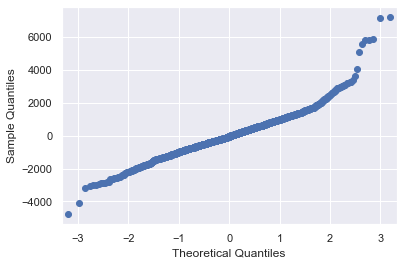

In [236]:
import matplotlib.pyplot as plt 
# Q-Q plot
res = final_ml.resid
sm.qqplot(res)
plt.show()

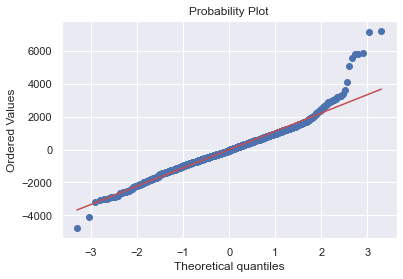

In [237]:
# Q-Q plot
from scipy import stats
import pylab
stats.probplot(res, dist = "norm", plot = pylab)
plt.show()

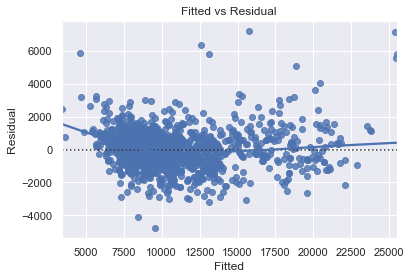

In [238]:
# Residuals vs Fitted plot
sns.residplot(x = pred, y = data.Price_new, lowess = True)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()

In [239]:
### Splitting the data into train and test data 
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data1_new, test_size = 0.2) # 20% test data

In [240]:
# preparing the model on train data 
model_train = smf.ols('Price_new ~ Model + Age_08_04 + Mfg_Month + KM +Fuel_Type + HP + Met_Color + Color + Automatic + cc + Doors + Quarterly_Tax + Mfr_Guarantee + BOVAG_Guarantee +       Guarantee_Period + ABS + Airbag_1 + Airbag_2 + Airco +Automatic_airco + Boardcomputer + CD_Player + Central_Lock +Powered_Windows + Power_Steering + Mistlamps + Sport_Model + Backseat_Divider + Metallic_Rim + Radio_cassette +Tow_Bar', data = data1_new).fit() # regression model

# prediction on test data set 
test_pred = model_train.predict(data_test)

# test residual values 
test_resid = test_pred - data_test.Price_new
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse

1044.0867854002968

In [241]:
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_new   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     413.8
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        07:12:52   Log-Likelihood:                -12133.
No. Observations:                1435   AIC:                         2.433e+04
Df Residuals:                    1403   BIC:                         2.450e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.073e+04     30.502    351.666      0.000    1.07e+04    1.08e+04
Model               75.1350     43.138      1.742      0.082      -9.488     159.758
Age_08_04        -2366.8640     65.567    -36.098      0.000   -2495.485   -2238.243
Mfg_Month         -343.4334     31.505    -10.901      0.000    -405.235    -281.632
KM                -608.9589     43.701    -13.935      0.000    -694.686    -523.232
Fuel_Type          290.7675     63.248      4.597      0.000     166.696     414.839
HP                 428.0395     41.498     10.315      0.000     346.635     509.444
Met_Color           -9.3440     32.891     -0.284      0.776     -73.864      55.176
Color              -63.3046     31.700     -1.997      0.046    -125.489      -1.120
Automatic          132.9475     31.038      4.283      0.000      72.061     193.834
cc                -197.1514    128.967     -1.529      0.127    -450.141      55.838
Doors              145.9619     32.303      4.518      0.000      82.594     209.330
Quarterly_Tax      864.2258     64.548     13.389      0.000     737.605     990.846
Mfr_Guarantee       97.6454     33.204      2.941      0.003      32.510     162.780
BOVAG_Guarantee    125.1166     35.450      3.529      0.000      55.577     194.657
Guarantee_Period   170.3654     37.624      4.528      0.000      96.560     244.171
ABS               -111.8513     45.589     -2.453      0.014    -201.280     -22.422
Airbag_1             5.1650     38.412      0.134      0.893     -70.186      80.516
Airbag_2          -106.6873     53.125     -2.008      0.045    -210.901      -2.473
Airco              126.8810     41.268      3.075      0.002      45.927     207.834
Automatic_airco    642.0327     39.288     16.342      0.000     564.964     719.102
Boardcomputer     -160.9366     49.259     -3.267      0.001    -257.565     -64.308
CD_Player           90.7118     37.727      2.404      0.016      16.705     164.718
Central_Lock       -32.6881     65.037     -0.503      0.615    -160.268      94.892
Powered_Windows    217.0902     65.174      3.331      0.001      89.242     344.939
Power_Steering       2.1647     38.058      0.057      0.955     -72.491      76.821
Mistlamps          -14.4538     43.467     -0.333      0.740     -99.722      70.814
Sport_Model        216.1837     35.951      6.013      0.000     145.660     286.708
Backseat_Divider  -126.5412     49.534     -2.555      0.011    -223.710     -29.373
Metallic_Rim        88.1637     34.829      2.531      0.011      19.842     156.486
Radio_cassette     -46.3861     33.264     -1.395      0.163    -111.638      18.865
Tow_Bar           -105.6020     32.435     -3.256      0.001    -169.229     -41.975
==============================================================================
Omnibus:                     

In [242]:
# train_data prediction
train_pred = model_train.predict(data_train)

# train residual values 
train_resid  = train_pred - data_train.Price_new
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
train_rmse

1158.767240652651

In [243]:
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_new   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     413.8
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        07:12:52   Log-Likelihood:                -12133.
No. Observations:                1435   AIC:                         2.433e+04
Df Residuals:                    1403   BIC:                         2.450e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.073e+04     30.502    351.666      0.000    1.07e+04    1.08e+04
Model               75.1350     43.138      1.742      0.082      -9.488     159.758
Age_08_04        -2366.8640     65.567    -36.098      0.000   -2495.485   -2238.243
Mfg_Month         -343.4334     31.505    -10.901      0.000    -405.235    -281.632
KM                -608.9589     43.701    -13.935      0.000    -694.686    -523.232
Fuel_Type          290.7675     63.248      4.597      0.000     166.696     414.839
HP                 428.0395     41.498     10.315      0.000     346.635     509.444
Met_Color           -9.3440     32.891     -0.284      0.776     -73.864      55.176
Color              -63.3046     31.700     -1.997      0.046    -125.489      -1.120
Automatic          132.9475     31.038      4.283      0.000      72.061     193.834
cc                -197.1514    128.967     -1.529      0.127    -450.141      55.838
Doors              145.9619     32.303      4.518      0.000      82.594     209.330
Quarterly_Tax      864.2258     64.548     13.389      0.000     737.605     990.846
Mfr_Guarantee       97.6454     33.204      2.941      0.003      32.510     162.780
BOVAG_Guarantee    125.1166     35.450      3.529      0.000      55.577     194.657
Guarantee_Period   170.3654     37.624      4.528      0.000      96.560     244.171
ABS               -111.8513     45.589     -2.453      0.014    -201.280     -22.422
Airbag_1             5.1650     38.412      0.134      0.893     -70.186      80.516
Airbag_2          -106.6873     53.125     -2.008      0.045    -210.901      -2.473
Airco              126.8810     41.268      3.075      0.002      45.927     207.834
Automatic_airco    642.0327     39.288     16.342      0.000     564.964     719.102
Boardcomputer     -160.9366     49.259     -3.267      0.001    -257.565     -64.308
CD_Player           90.7118     37.727      2.404      0.016      16.705     164.718
Central_Lock       -32.6881     65.037     -0.503      0.615    -160.268      94.892
Powered_Windows    217.0902     65.174      3.331      0.001      89.242     344.939
Power_Steering       2.1647     38.058      0.057      0.955     -72.491      76.821
Mistlamps          -14.4538     43.467     -0.333      0.740     -99.722      70.814
Sport_Model        216.1837     35.951      6.013      0.000     145.660     286.708
Backseat_Divider  -126.5412     49.534     -2.555      0.011    -223.710     -29.373
Metallic_Rim        88.1637     34.829      2.531      0.011      19.842     156.486
Radio_cassette     -46.3861     33.264     -1.395      0.163    -111.638      18.865
Tow_Bar           -105.6020     32.435     -3.256      0.001    -169.229     -41.975
==============================================================================
Omnibus:                     